In [1]:
#Application Programme Interface
#it acts as an intermediary between two different applications that want to talk to
#each other
#it has a client and a server
#client is the application or person submitting the request
#the server is the person or application sending the response to that request
#so API is kind of a middleman

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #view only 15 rows
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '85956212-19c7-41de-bc58-f6afb3f64150',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-17T22:25:00.515Z', 'error_code': 0, 'error_message': None, 'elapsed': 104, 'credit_count': 1, 'notice': None, 'total_count': 9993}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11606, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [5]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972708e+07,1.972708e+07,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522413,3.355635e+10,-19.9601,0.190592,-0.147331,11.336691,-3.555541,-3.928926,1.475521,1.267238e+12,53.8925,1.349009e+12,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269335,1.697667e+10,-18.7244,-0.110393,-0.800643,9.478660,-3.486577,9.008755,11.048115,4.086643e+11,17.3795,4.086643e+11,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000199,6.297246e+10,-18.6869,0.002230,-0.027035,0.017056,0.057993,-0.015588,-0.031696,1.132471e+11,4.8161,1.170955e+11,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656022,1.749030e+09,-16.2421,-0.280621,-0.753867,8.707554,-6.346100,-1.531298,3.374415,8.392342e+10,3.5691,8.392342e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.641585e+08,5.802841e+08,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.912889,2.306774e+09,-25.4124,0.151800,-2.531913,10.082815,8.645860,-9.507522,10.852041,7.236829e+10,3.0776,9.047376e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625139,3.564340e+09,5.9357,0.368006,7.831414,42.773923,22.923264,20.027286,24.669062,3.488612e+10,1.4836,6.251395e+10,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.378491e+10,3.378491e+10,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000087,6.796004e+09,-14.4082,0.002671,0.013987,0.004109,-0.001683,-0.010128,-0.003132,3.378784e+10,1.4369,3.378784e+10,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512048e+09,5.109122e+09,True,NaN,8,3.414167e+09,2.433068e+10,None,2024-07-17T22:23:00.000Z,7.126389,2.412442e+08,-15.0383,-0.056290,-2.638225,-1.610484,-7.495946,11.502684,9.519205,1.790183e+10,0.7613,3.640959e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.451577e+11,1.451577e+11,True,NaN,9,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.121554,7.421505e+08,-29.3672,-0.331911,-2.002643,13.256023,-6.636163,-20.544689,-20.073230,1.764452e+10,0.7504,1.764452e+10,None,2024-07-17T

In [6]:
df['timestamp'] = pd.to_datetime('now')
#lets add a timestamp to know when the automated loops was run
#to make sure it was run sucessfully
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972708e+07,1.972708e+07,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522413,3.355635e+10,-19.9601,0.190592,-0.147331,11.336691,-3.555541,-3.928926,1.475521,1.267238e+12,53.8925,1.349009e+12,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269335,1.697667e+10,-18.7244,-0.110393,-0.800643,9.478660,-3.486577,9.008755,11.048115,4.086643e+11,17.3795,4.086643e+11,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000199,6.297246e+10,-18.6869,0.002230,-0.027035,0.017056,0.057993,-0.015588,-0.031696,1.132471e+11,4.8161,1.170955e+11,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656022,1.749030e+09,-16.2421,-0.280621,-0.753867,8.707554,-6.346100,-1.531298,3.374415,8.392342e+10,3.5691,8.392342e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.641585e+08,5.802841e+08,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.912889,2.306774e+09,-25.4124,0.151800,-2.531913,10.082815,8.645860,-9.507522,10.852041,7.236829e+10,3.0776,9.047376e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625139,3.564340e+09,5.9357,0.368006,7.831414,42.773923,22.923264,20.027286,24.669062,3.488612e+10,1.4836,6.251395e+10,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.378491e+10,3.378491e+10,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000087,6.796004e+09,-14.4082,0.002671,0.013987,0.004109,-0.001683,-0.010128,-0.003132,3.378784e+10,1.4369,3.378784e+10,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512048e+09,5.109122e+09,True,NaN,8,3.414167e+09,2.433068e+10,None,2024-07-17T22:23:00.000Z,7.126389,2.412442e+08,-15.0383,-0.056290,-2.638225,-1.610484,-7.495946,11.502684,9.519205,1.790183e+10,0.7613,3.640959e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [7]:
#we just dont want it to create 5000 rows
#but to automate over and over and create 5000 overtime 

def api_runner():
    global df #this declares df as a global varaible
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '85956212-19c7-41de-bc58-f6afb3f64150',
    }

    session = Session()
    session.headers.update(headers)

    try:     
        response = session.get(url, params=parameters)
        data = json.loads(response.text)#since we have the original dataframe set up
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e: 
        print(e)
        #this like a loop so we append it to a new dataframe 
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)
    #so basically df2 keeps updatng and it appends its update to a new dataframe df
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df                   after running it once without the csv automation, you can run it again with the csv automation
    #like the above to avoid duplication
    
    if not os.path.isfile(r'C:\Users\user\API.csv'):
        df.to_csv(r'C:\Users\user\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\user\API.csv', mode='a', header=False)#you dont need the header again                                                              
    #lets append it into a csv                                     #WHEN appending rows 

In [8]:
import os
from time import time
from time import sleep
#these are gonna give the ability to track time and run through or call the function in intervals
#that we choose

for i in range(333):#333 runs is the max for running the API for a day
    api_runner()
    print('API run completed!')
    sleep(60) #  1 minute intervals
exit()

API run completed!
API run completed!



KeyboardInterrupt



In [9]:
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972708e+07,1.972708e+07,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522413,3.355635e+10,-19.9601,0.190592,-0.147331,11.336691,-3.555541,-3.928926,1.475521,1.267238e+12,53.8925,1.349009e+12,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269335,1.697667e+10,-18.7244,-0.110393,-0.800643,9.478660,-3.486577,9.008755,11.048115,4.086643e+11,17.3795,4.086643e+11,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000199,6.297246e+10,-18.6869,0.002230,-0.027035,0.017056,0.057993,-0.015588,-0.031696,1.132471e+11,4.8161,1.170955e+11,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656022,1.749030e+09,-16.2421,-0.280621,-0.753867,8.707554,-6.346100,-1.531298,3.374415,8.392342e+10,3.5691,8.392342e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.641585e+08,5.802841e+08,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.912889,2.306774e+09,-25.4124,0.151800,-2.531913,10.082815,8.645860,-9.507522,10.852041,7.236829e+10,3.0776,9.047376e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625139,3.564340e+09,5.9357,0.368006,7.831414,42.773923,22.923264,20.027286,24.669062,3.488612e+10,1.4836,6.251395e+10,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.378491e+10,3.378491e+10,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000087,6.796004e+09,-14.4082,0.002671,0.013987,0.004109,-0.001683,-0.010128,-0.003132,3.378784e+10,1.4369,3.378784e+10,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512048e+09,5.109122e+09,True,NaN,8,3.414167e+09,2.433068e+10,None,2024-07-17T22:23:00.000Z,7.126389,2.412442e+08,-15.0383,-0.056290,-2.638225,-1.610484,-7.495946,11.502684,9.519205,1.790183e+10,0.7613,3.640959e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [10]:
df3 = pd.read_csv(r'C:\Users\user\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.971832e+07,1.971832e+07,False,NaN,1,NaN,NaN,NaN,2024-06-29T11:51:00.000Z,61056.653674,2.222033e+10,-0.3078,0.231682,-0.855482,-5.004383,-9.991962,-0.183201,-13.225467,1.203934e+12,53.1905,1.282190e+12,NaN,2024-06-29T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
1,1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201847e+08,1.201847e+08,True,NaN,2,NaN,NaN,NaN,2024-06-29T11:50:00.000Z,3398.541536,1.120568e+10,-7.0827,0.142461,-1.470624,-2.703592,-9.116165,12.753887,-5.728956,4.084528e+11,18.0475,4.084528e+11,NaN,2024-06-29T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
2,2,825,Tether USDt,USDT,tether,90398,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.128115e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-06-29T11:50:00.000Z,0.998338,4.328517e+10,-7.0553,-0.005424,-0.029003,-0.105593,-0.089652,-0.142480,-0.193651,1.126240e+11,4.9763,1.158839e+11,NaN,2024-06-29T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-29 12:53:38.160372
3,3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,NaN,2024-06-29T11:50:00.000Z,572.849334,1.563929e+09,-5.2042,0.069093,-0.892769,-2.408654,-3.609904,-0.004276,-5.355945,8.454298e+10,3.7355,8.454298e+10,NaN,2024-06-29T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
4,4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.623585e+08,5.790702e+08,True,NaN,5,NaN,NaN,NaN,2024-06-29T11:50:00.000Z,142.406620,2.102901e+09,-32.2117,-0.131367,-2.000820,6.165624,-14.469974,10.429926,-27.236264,6.584291e+10,2.9093,8.246342e+10,NaN,2024-06-29T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
5,5,3408,USDC,USDC,usd-coin,20449,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.230173e+10,3.230173e+10,False,NaN,6,NaN,NaN,NaN,2024-06-29T11:50:00.000Z,0.999892,4.929822e+09,-6.8376,0.000955,0.003228,-0.007115,-0.018099,-0.005595,-0.026357,3.229825e+10,1.4271,3.229825e+10,NaN,2024-06-29T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-29 12:53:38.160372
6,6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,NaN,2024-06-29T11:51:00.000Z,0.476118,6.732157e+08,-22.3355,0.043708,-0.743264,-1.994053,-8.501316,-4.292097,-23.971643,2.651422e+10,1.1713,4.761181e+10,NaN,2024-06-29T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
7,7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.459912e+09,5.108267e+09,True,NaN,8,3.414167e+09,2.589979e+10,NaN,2024-06-29T11:50:00.000Z,7.585978,2.048558e+08,-15.9546,0.540612,-1.375771,5.830567,17.107916,45.865477,46.099779,1.866084e+10,0.8245,3.875121e+10,NaN,2024-06-29T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 12:53:38.160372
8,8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scr

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972708e+07,1.972708e+07,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522413,3.355635e+10,-19.9601,0.190592,-0.147331,11.336691,-3.555541,-3.928926,1.475521,1.267238e+12,53.8925,1.349009e+12,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202212e+08,1.202212e+08,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269335,1.697667e+10,-18.7244,-0.110393,-0.800643,9.478660,-3.486577,9.008755,11.048115,4.086643e+11,17.3795,4.086643e+11,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.132246e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000199,6.297246e+10,-18.6869,0.002230,-0.027035,0.017056,0.057993,-0.015588,-0.031696,1.132471e+11,4.8161,1.170955e+11,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656022,1.749030e+09,-16.2421,-0.280621,-0.753867,8.707554,-6.346100,-1.531298,3.374415,8.392342e+10,3.5691,8.392342e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.641585e+08,5.802841e+08,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.912889,2.306774e+09,-25.4124,0.151800,-2.531913,10.082815,8.645860,-9.507522,10.852041,7.236829e+10,3.0776,9.047376e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625139,3.564340e+09,5.9357,0.368006,7.831414,42.773923,22.923264,20.027286,24.669062,3.488612e+10,1.4836,6.251395e+10,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.378491e+10,3.378491e+10,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000087,6.796004e+09,-14.4082,0.002671,0.013987,0.004109,-0.001683,-0.010128,-0.003132,3.378784e+10,1.4369,3.378784e+10,None,2024-07-17T22:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512048e+09,5.109122e+09,True,NaN,8,3.414167e+09,2.433068e+10,None,2024-07-17T22:23:00.000Z,7.126389,2.412442e+08,-15.0383,-0.056290,-2.638225,-1.610484,-7.495946,11.502684,9.519205,1.790183e+10,0.7613,3.640959e+10,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19727075.000,19727075.000,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522,33556348097.599,-19.960,0.191,-0.147,11.337,-3.556,-3.929,1.476,1267238149521.907,53.892,1349008970663.930,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221218.030,120221218.030,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269,16976670466.317,-18.724,-0.110,-0.801,9.479,-3.487,9.009,11.048,408664299894.164,17.380,408664299894.160,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,113224555138.644,117072162581.788,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,62972456754.168,-18.687,0.002,-0.027,0.017,0.058,-0.016,-0.032,113247081352.016,4.816,117095454283.050,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582043.820,147582043.820,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656,1749029512.132,-16.242,-0.281,-0.754,8.708,-6.346,-1.531,3.374,83923417952.846,3.569,83923417952.850,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464158491.375,580284050.032,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.913,2306773964.164,-25.412,0.152,-2.532,10.083,8.646,-9.508,10.852,72368291505.370,3.078,90473762882.640,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,55805339473.000,99987452475.000,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625,3564339908.745,5.936,0.368,7.831,42.774,22.923,20.027,24.669,34886120546.348,1.484,62513947367.400,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33784911670.094,33784911670.094,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,6796003608.576,-14.408,0.003,0.014,0.004,-0.002,-0.010,-0.003,33787841644.288,1.437,33787841644.290,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2512048459.272,5109122158.198,True,NaN,8,3414166606.000,24330678846.291,None,2024-07-17T22:23:00.000Z,7.126,241244192.556,-15.038,-0.056,-2.638,-1.610,-7.496,11.503,9.519,17901834140.566,0.761,36409591201.300,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145157726383.705,145157726383.705,True,NaN,9,NaN,NaN,None,

In [13]:
dfg = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
'quote.USD.percent_change_30d','quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
dfg

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.190,-0.143,11.368,-3.514,-3.907,1.504
Ethereum,-0.058,-0.749,9.541,-3.469,9.047,11.085
Tether USDt,0.003,-0.032,0.016,0.057,-0.014,-0.029
BNB,-0.266,-0.728,8.736,-6.344,-1.519,3.386
Solana,0.170,-2.512,10.102,8.647,-9.498,10.862
XRP,0.365,7.905,42.823,23.003,20.084,24.734
USDC,0.001,0.004,0.001,-0.006,-0.010,-0.005
Toncoin,-0.052,-2.637,-1.618,-7.496,11.502,9.513
Dogecoin,-0.234,-1.890,13.278,-6.603,-20.495,-20.032


In [14]:
dfserie = dfg.stack()
dfserie

name                                     
Bitcoin      quote.USD.percent_change_1h      0.190
             quote.USD.percent_change_24h    -0.143
             quote.USD.percent_change_7d     11.368
             quote.USD.percent_change_30d    -3.514
             quote.USD.percent_change_60d    -3.907
             quote.USD.percent_change_90d     1.504
Ethereum     quote.USD.percent_change_1h     -0.058
             quote.USD.percent_change_24h    -0.749
             quote.USD.percent_change_7d      9.541
             quote.USD.percent_change_30d    -3.469
             quote.USD.percent_change_60d     9.047
             quote.USD.percent_change_90d    11.085
Tether USDt  quote.USD.percent_change_1h      0.003
             quote.USD.percent_change_24h    -0.032
             quote.USD.percent_change_7d      0.016
             quote.USD.percent_change_30d     0.057
             quote.USD.percent_change_60d    -0.014
             quote.USD.percent_change_90d    -0.029
BNB          quote.USD

In [15]:
df4 = dfserie.to_frame(name='values')
df4

values
name                                            
Bitcoin     quote.USD.percent_change_1h    0.190
            quote.USD.percent_change_24h  -0.143
            quote.USD.percent_change_7d   11.368
            quote.USD.percent_change_30d  -3.514
            quote.USD.percent_change_60d  -3.907
            quote.USD.percent_change_90d   1.504
Ethereum    quote.USD.percent_change_1h   -0.058
            quote.USD.percent_change_24h  -0.749
            quote.USD.percent_change_7d    9.541
            quote.USD.percent_change_30d  -3.469
            quote.USD.percent_change_60d   9.047
            quote.USD.percent_change_90d  11.085
Tether USDt quote.USD.percent_change_1h    0.003
            quote.USD.percent_change_24h  -0.032
            quote.USD.percent_change_7d    0.016
            quote.USD.percent_change_30d   0.057
            quote.USD.percent_change_60d  -0.014
            quote.USD.percent_change_90d  -0.029
BNB         quote.USD.percent_change_1h   -0.266
            quote.USD.percent_change_24h  -0.728
            quote.USD.percent_change_7d    8.736
            quote.USD.percent_change_30d  -6.344
            quote.USD.percent_change_60d  -1.519
            quote.USD.percent_change_90d   3.386
Solana      quote.USD.percent_change_1h    0.170
            quote.USD.percent_change_24h  -2.512
            quote.USD.percent_change_7d   10.102
            quote.USD.percent_change_30d   8.647
            quote.USD.percent_change_60d  -9.498
            quote.USD.percent_change_90d  10.862
XRP         quote.USD.percent_change_1h    0.365
            quote.USD.percent_change_24h   7.905
            quote.USD.percent_change_7d   42.823
            quote.USD.percent_change_30d  23.003
            quote.USD.percent_change_60d  20.084
            quote.USD.percent_change_90d  24.734
USDC        quote.USD.percent_change_1h    0.001
            quote.USD.percent_change_24h   0.004
            quote.USD.percent_change_7d    0.001
            quote.USD.percent_change_30d  -0.006
            quote.USD.percent_change_60d  -0.010
            quote.USD.percent_change_90d  -0.005
Toncoin     quote.USD.percent_change_1h   -0.052
            quote.USD.percent_change_24h  -2.637
            quote.USD.percent_change_7d   -1.618
            quote.USD.percent_change_30d  -7.496
            quote.USD.percent_change_60d  11.502
            quote.USD.percent_change_90d   9.513
Dogecoin    quote.USD.percent_change_1h   -0.234
            quote.USD.percent_change_24h  -1.890
            quote.USD.percent_change_7d   13.278
            quote.USD.percent_change_30d  -6.603
            quote.USD.percent_change_60d -20.495
            quote.USD.percent_change_90d -20.032
Cardano     quote.USD.percent_change_1h   -0.017
            quote.USD.percent_change_24h   0.597
            quote.USD.percent_change_7d   14.548
            quote.USD.percent_change_30d   8.308
            quote.USD.percent_change_60d  -8.935
            quote.USD.percent_change_90d  -3.643
TRON        quote.USD.percent_change_1h   -0.045
            quote.USD.percent_change_24h  -0.199
            quote.USD.percent_change_7d    2.013
            quote.USD.percent_change_30d  14.474
            quote.USD.percent_change_60d   8.681
            quote.USD.percent_change_90d  22.685
Shiba Inu   quote.USD.percent_change_1h   -0.157
            quote.USD.percent_change_24h  -2.875
            quote.USD.percent_change_7d   13.973
            quote.USD.percent_change_30d  -4.502
            quote.USD.percent_change_60d -24.978
            quote.USD.percent_change_90d -18.163
Avalanche   quote.USD.percent_change_1h   -0.570
            quote.USD.percent_change_24h  -1.896
            quote.USD.percent_change_7d    6.983
            quote.USD.percent_change_30d  -4.123
            quote.USD.percent_change_60d -26.041
            quote.USD.percent_change_90d -20.975
Polkadot    quote.USD.percent_change_1h   -0.179
            quote.USD.percent_change_24h  -0.628
            quote.USD.pe

In [16]:
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.190
1,Bitcoin,quote.USD.percent_change_24h,-0.143
2,Bitcoin,quote.USD.percent_change_7d,11.368
3,Bitcoin,quote.USD.percent_change_30d,-3.514
4,Bitcoin,quote.USD.percent_change_60d,-3.907
5,Bitcoin,quote.USD.percent_change_90d,1.504
6,Ethereum,quote.USD.percent_change_1h,-0.058
7,Ethereum,quote.USD.percent_change_24h,-0.749
8,Ethereum,quote.USD.percent_change_7d,9.541
9,Ethereum,quote.USD.percent_change_30d,-3.469


In [17]:
dfviz = df5.rename(columns={'level_1': 'percent_change'})
dfviz

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.190
1,Bitcoin,quote.USD.percent_change_24h,-0.143
2,Bitcoin,quote.USD.percent_change_7d,11.368
3,Bitcoin,quote.USD.percent_change_30d,-3.514
4,Bitcoin,quote.USD.percent_change_60d,-3.907
5,Bitcoin,quote.USD.percent_change_90d,1.504
6,Ethereum,quote.USD.percent_change_1h,-0.058
7,Ethereum,quote.USD.percent_change_24h,-0.749
8,Ethereum,quote.USD.percent_change_7d,9.541
9,Ethereum,quote.USD.percent_change_30d,-3.469


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

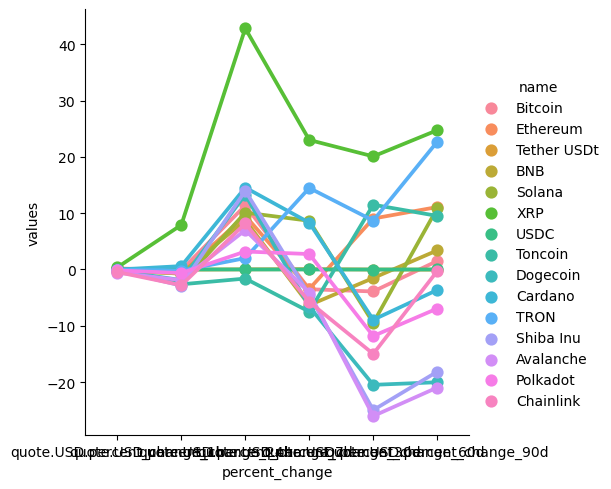

In [19]:
sns.catplot(x='percent_change', y='values', hue='name',data=dfviz, kind='point')

In [20]:
dfg.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,XRP,USDC,Toncoin,Dogecoin,Cardano,TRON,Shiba Inu,Avalanche,Polkadot,Chainlink
quote.USD.percent_change_1h,0.190,-0.058,0.003,-0.266,0.170,0.365,0.001,-0.052,-0.234,-0.017,-0.045,-0.157,-0.570,-0.179,-0.458
quote.USD.percent_change_24h,-0.143,-0.749,-0.032,-0.728,-2.512,7.905,0.004,-2.637,-1.890,0.597,-0.199,-2.875,-1.896,-0.628,-2.797
quote.USD.percent_change_7d,11.368,9.541,0.016,8.736,10.102,42.823,0.001,-1.618,13.278,14.548,2.013,13.973,6.983,3.188,8.165
quote.USD.percent_change_30d,-3.514,-3.469,0.057,-6.344,8.647,23.003,-0.006,-7.496,-6.603,8.308,14.474,-4.502,-4.123,2.738,-5.772
quote.USD.percent_change_60d,-3.907,9.047,-0.014,-1.519,-9.498,20.084,-0.010,11.502,-20.495,-8.935,8.681,-24.978,-26.041,-11.823,-15.001
quote.USD.percent_change_90d,1.504,11.085,-0.029,3.386,10.862,24.734,-0.005,9.513,-20.032,-3.643,22.685,-18.163,-20.975,-6.941,-0.289


<Axes: >

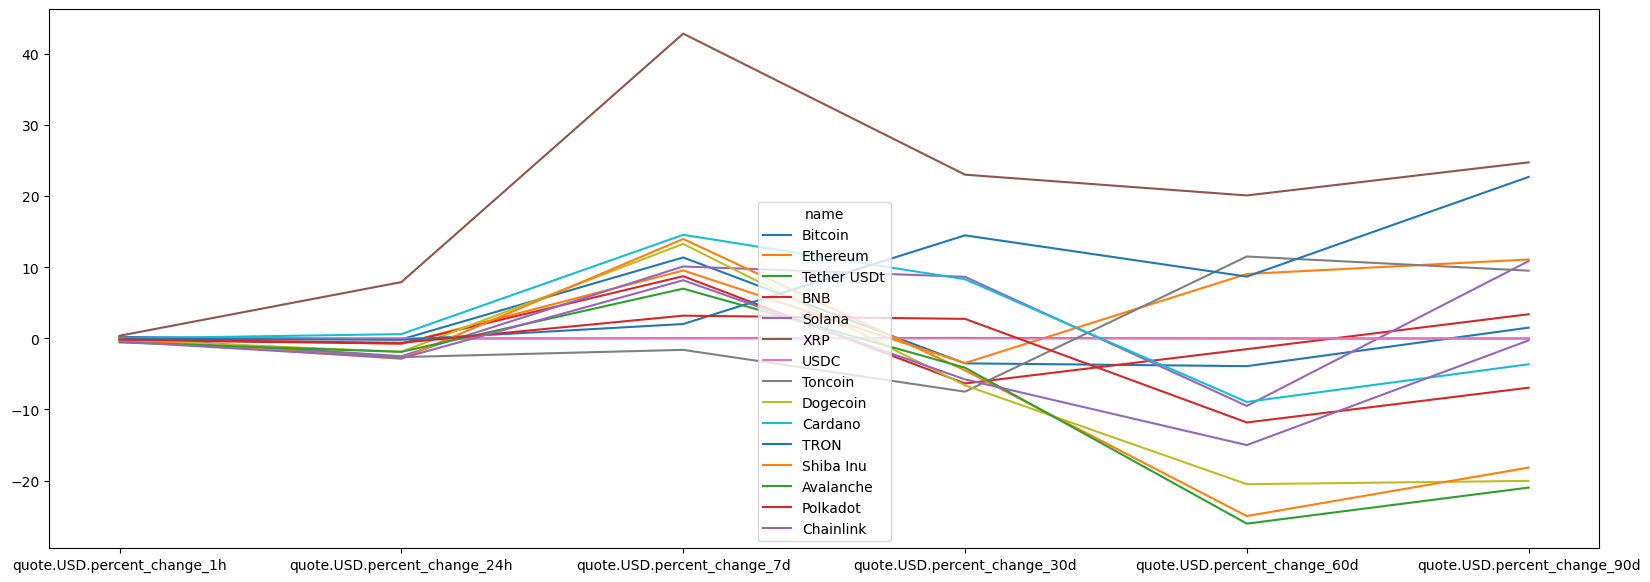

In [21]:
dfg.transpose().plot(figsize= (20,7))

In [22]:
dfviz

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.190
1,Bitcoin,quote.USD.percent_change_24h,-0.143
2,Bitcoin,quote.USD.percent_change_7d,11.368
3,Bitcoin,quote.USD.percent_change_30d,-3.514
4,Bitcoin,quote.USD.percent_change_60d,-3.907
5,Bitcoin,quote.USD.percent_change_90d,1.504
6,Ethereum,quote.USD.percent_change_1h,-0.058
7,Ethereum,quote.USD.percent_change_24h,-0.749
8,Ethereum,quote.USD.percent_change_7d,9.541
9,Ethereum,quote.USD.percent_change_30d,-3.469


In [23]:
dfviz['percent_change'] = dfviz['percent_change'].replace(['quote.USD.percent_change_1h',
                                                           'quote.USD.percent_change_24h',
                                                           'quote.USD.percent_change_7d',
                                                           'quote.USD.percent_change_30d',
                                                           'quote.USD.percent_change_60d',
                                                           'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [24]:
dfviz

,name,percent_change,values
0,Bitcoin,1h,0.190
1,Bitcoin,24h,-0.143
2,Bitcoin,7d,11.368
3,Bitcoin,30d,-3.514
4,Bitcoin,60d,-3.907
5,Bitcoin,90d,1.504
6,Ethereum,1h,-0.058
7,Ethereum,24h,-0.749
8,Ethereum,7d,9.541
9,Ethereum,30d,-3.469


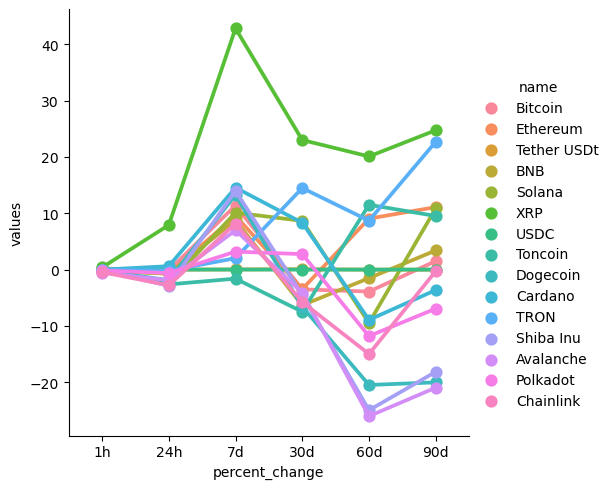

In [25]:
sns.catplot(x='percent_change', y='values', hue='name',data=dfviz, kind='point')

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19727075.000,19727075.000,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522,33556348097.599,-19.960,0.191,-0.147,11.337,-3.556,-3.929,1.476,1267238149521.907,53.892,1349008970663.930,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221218.030,120221218.030,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269,16976670466.317,-18.724,-0.110,-0.801,9.479,-3.487,9.009,11.048,408664299894.164,17.380,408664299894.160,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,113224555138.644,117072162581.788,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,62972456754.168,-18.687,0.002,-0.027,0.017,0.058,-0.016,-0.032,113247081352.016,4.816,117095454283.050,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582043.820,147582043.820,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656,1749029512.132,-16.242,-0.281,-0.754,8.708,-6.346,-1.531,3.374,83923417952.846,3.569,83923417952.850,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464158491.375,580284050.032,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.913,2306773964.164,-25.412,0.152,-2.532,10.083,8.646,-9.508,10.852,72368291505.370,3.078,90473762882.640,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,55805339473.000,99987452475.000,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625,3564339908.745,5.936,0.368,7.831,42.774,22.923,20.027,24.669,34886120546.348,1.484,62513947367.400,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33784911670.094,33784911670.094,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,6796003608.576,-14.408,0.003,0.014,0.004,-0.002,-0.010,-0.003,33787841644.288,1.437,33787841644.290,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2512048459.272,5109122158.198,True,NaN,8,3414166606.000,24330678846.291,None,2024-07-17T22:23:00.000Z,7.126,241244192.556,-15.038,-0.056,-2.638,-1.610,-7.496,11.503,9.519,17901834140.566,0.761,36409591201.300,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145157726383.705,145157726383.705,True,NaN,9,NaN,NaN,None,

In [27]:
 dfk= df[['name', 'quote.USD.price', 'timestamp']]
dfk

,name,quote.USD.price,timestamp
0,Bitcoin,64238.522,2024-07-17 23:25:04.494307
1,Ethereum,3399.269,2024-07-17 23:25:04.494307
2,Tether USDt,1.000,2024-07-17 23:25:04.494307
3,BNB,568.656,2024-07-17 23:25:04.494307
4,Solana,155.913,2024-07-17 23:25:04.494307
5,XRP,0.625,2024-07-17 23:25:04.494307
6,USDC,1.000,2024-07-17 23:25:04.494307
7,Toncoin,7.126,2024-07-17 23:25:04.494307
8,Dogecoin,0.122,2024-07-17 23:25:04.494307
9,Cardano,0.439,2024-07-17 23:25:04.494307


In [28]:
dfbit = dfk[dfk['name'] == 'Bitcoin']
dfbit

,name,quote.USD.price,timestamp
0,Bitcoin,64238.522,2024-07-17 23:25:04.494307
0,Bitcoin,64238.522,2024-07-17 23:25:09.335032
0,Bitcoin,64281.812,2024-07-17 23:26:11.935895


C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

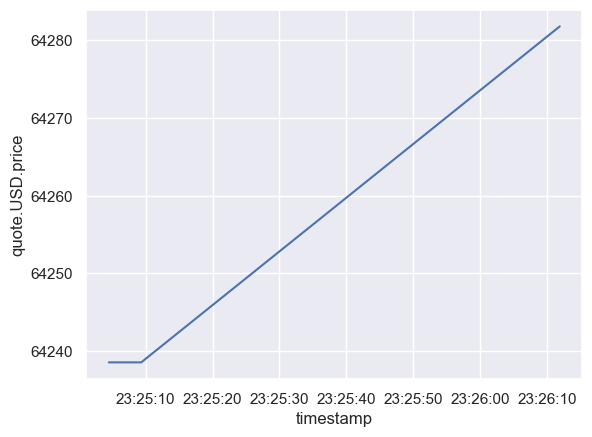

In [29]:
sns.set_theme(style='darkgrid')


sns.lineplot(x='timestamp', y='quote.USD.price', data=dfbit )
#price in bitcoin dropped over each minitue and then rose up again

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11606,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19727075.000,19727075.000,False,NaN,1,NaN,NaN,None,2024-07-17T22:24:00.000Z,64238.522,33556348097.599,-19.960,0.191,-0.147,11.337,-3.556,-3.929,1.476,1267238149521.907,53.892,1349008970663.930,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
1,1027,Ethereum,ETH,ethereum,9146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221218.030,120221218.030,True,NaN,2,NaN,NaN,None,2024-07-17T22:23:00.000Z,3399.269,16976670466.317,-18.724,-0.110,-0.801,9.479,-3.487,9.009,11.048,408664299894.164,17.380,408664299894.160,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
2,825,Tether USDt,USDT,tether,91802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,113224555138.644,117072162581.788,True,NaN,3,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,62972456754.168,-18.687,0.002,-0.027,0.017,0.058,-0.016,-0.032,113247081352.016,4.816,117095454283.050,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-17 23:25:04.494307
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582043.820,147582043.820,False,NaN,4,NaN,NaN,None,2024-07-17T22:23:00.000Z,568.656,1749029512.132,-16.242,-0.281,-0.754,8.708,-6.346,-1.531,3.374,83923417952.846,3.569,83923417952.850,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464158491.375,580284050.032,True,NaN,5,NaN,NaN,None,2024-07-17T22:23:00.000Z,155.913,2306773964.164,-25.412,0.152,-2.532,10.083,8.646,-9.508,10.852,72368291505.370,3.078,90473762882.640,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
5,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,55805339473.000,99987452475.000,False,NaN,6,NaN,NaN,None,2024-07-17T22:24:00.000Z,0.625,3564339908.745,5.936,0.368,7.831,42.774,22.923,20.027,24.669,34886120546.348,1.484,62513947367.400,None,2024-07-17T22:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
6,3408,USDC,USDC,usd-coin,21030,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33784911670.094,33784911670.094,False,NaN,7,NaN,NaN,None,2024-07-17T22:23:00.000Z,1.000,6796003608.576,-14.408,0.003,0.014,0.004,-0.002,-0.010,-0.003,33787841644.288,1.437,33787841644.290,None,2024-07-17T22:23:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-17 23:25:04.494307
7,11419,Toncoin,TON,toncoin,463,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2512048459.272,5109122158.198,True,NaN,8,3414166606.000,24330678846.291,None,2024-07-17T22:23:00.000Z,7.126,241244192.556,-15.038,-0.056,-2.638,-1.610,-7.496,11.503,9.519,17901834140.566,0.761,36409591201.300,None,2024-07-17T22:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-17 23:25:04.494307
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145157726383.705,145157726383.705,True,NaN,9,NaN,NaN,None,